<a href="https://www.kaggle.com/code/gaurobsaha/google-app-store-eda?scriptVersionId=223237043" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Google Playstore Data 
### Complete EDA

## About Dataset

>'Description'

This dataset was taken from Kaggle. Get the dataset: [Link](https://www.kaggle.com/datasets/lava18/google-play-store-apps)

>`Context`

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

>`Content`

Each app (row) has values for catergory, rating, size, and more.

>`Acknowledgements`

This information is scraped from the Google Play Store. This app information would not be available without it.

>`Inspiration`

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

 ### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline 
#this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot


### 2. Data loading and Exploration and cleaning

In [2]:
data=pd.read_csv('/kaggle/input/google-play-store-apps/googleplaystore.csv') # Read the dataset
pd.set_option('display.max_columns',None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows',None) # this is to display all the rows in the dataframe
warnings.filterwarnings('ignore') # Hide all warnings
data.head() # show the first 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.shape

(10841, 13)

In [4]:
print(f"The number of rows in the dataset is {data.shape[0]}, and the number of columns is {data.shape[1]}." )

The number of rows in the dataset is 10841, and the number of columns is 13.


In [5]:
#Not enough, let's have a look on the columns and their data types using detailed info function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
# name of the columns
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Observations
---
1. There are 10841 rows and 13 columns in the dataset.

2. The columns are of different data types.

3. The columns in the datasets are:

   >'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',   'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',   'Android Ver'

4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.

5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.

   >'Size', 'Installs', 'Price'

In [7]:
# summary statistics of the numerical columns
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Observations:
---
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `Size`, `Installs`, `Price` are also numeric, we must convert them to numeric data type in data wrangling process.


---
- Let's clean the Size column first

In [8]:
# check unique values in the Size column
data["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [9]:
# checking for unique values and their counts in the Size column
data["Size"].value_counts().head(10)

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
Name: count, dtype: int64

### Observations with the "Size" column
1. "Varies with device
2. "K": Some values are Kilobytes
3. "M": Some values are Megabytes

In [10]:
## checking for null values in the "Size" column
data["Size"].isnull().sum()

0

### We want to confirm, if there is only 3 types of value in the "Size" column

In [11]:
# find the values in size column which has 'M' in it
data["Size"].loc[data["Size"].str.contains("M")].value_counts().sum()

8829

In [12]:
# find the values in size column which has 'k' in it
data["Size"].loc[data["Size"].str.contains("k")].value_counts().sum()

316

In [13]:
# find the values in size column which has 'Varies with device' in it
data["Size"].loc[data["Size"].str.contains("Varies with device")].value_counts().sum()

1695

In [14]:
# Total Values in Size column
len(data)

10841

In [15]:
## Total Values in Size column
8830+316+1695

10841

# Observation
- We have 8830 values in M units
- We have 316 values in k units
- We have 1695 value in Varies with device

> Let's convert the M and K units into bytes and then remove the M and K from the values and convert them into numeric data type and replace 'Varies with device' with nan

In [16]:
# check the head of the size column before the conversion
data["Size"].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [17]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric
def convert_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size


In [18]:
# Call the above function
data['Size'] = data['Size'].apply(convert_size)

In [19]:
## check the head of the size column after the conversion
data["Size"].head(10)

0    19922944.0
1    14680064.0
2     9122611.2
3    26214400.0
4     2936012.8
5     5872025.6
6    19922944.0
7    30408704.0
8    34603008.0
9     3250585.6
Name: Size, dtype: object

In [20]:
# changing the "Size" column name
data.rename(columns={"Size": "Size_in_bytes"}, inplace=True)


In [21]:
#print(data.head())
type(data["Size_in_bytes"].dtypes)

numpy.dtypes.ObjectDType

In [22]:
# creating a new column "Size_in_Mb" and change the dataset
data["Size_in_bytes"] = pd.to_numeric(data["Size_in_bytes"], errors="coerce")
data["Size_in_Mb"]=data["Size_in_bytes"]/(1024*1024)

In [23]:
data.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


# Obervations with "Installs" column
- The only problem I see here is the + sign in the values, let's remove them and convert the column into numeric data type.
- The total values in the Installs column are 10841 and there are no null values in the column.

- However, one value 0 has no plus sign

- Let's remove the plus sign + and , from the values and convert them into numeric data type


In [24]:
#checking for null values
data["Installs"].isnull().sum()

0

In [25]:
# checking for unique values
data["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [26]:
# checking for unique values
data["Installs"].nunique()

22

In [27]:
# checking for unique values and their counts
data["Installs"].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [28]:
# datatype of installs column before conversion
data["Installs"].dtype

dtype('O')

In [29]:
# removing '+' and ',' from the column and filling up the missing values with 0s
data["Installs"] = data["Installs"].str.replace(r'[+,]', '', regex=True)
data["Installs"] = pd.to_numeric(data["Installs"], errors='coerce')
data["Installs"].fillna(0, inplace=True)

In [30]:
# converting the column to int
data["Installs"] = data["Installs"].astype(int)
data["Installs"].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               16
Name: count, dtype: int64

In [31]:
data.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [32]:
# this will show the data type of the column
data['Installs'].dtype 


dtype('int64')

> We can generate a new columns based on the installation values, which will be helpful in our analysis.


In [33]:
# data before adding new column
data.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [34]:
data['Installs'].max() # this will show the value counts of the column


1000000000

In [35]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['No_Install', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
data['Installs_category'] = pd.cut(data['Installs'], bins=bins, labels=labels)

In [36]:
# check the value counts of the new column
data['Installs_category'].value_counts()


Installs_category
Low                   2161
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
No_Install              16
Name: count, dtype: int64

In [37]:
## Data after adding the new column
data.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,Moderate
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,Very High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,Top Notch
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,More than moderate


# Observation for Price column

In [38]:
# checking for missing values
data["Price"].isnull().sum()

0

In [39]:
# checking the value counts of the "Price" column
data["Price"].value_counts()

Price
0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$19.40          1
$3.90           1
$1.96           1
$4.60           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$3.28           1
$4.80           1
$4.59           1
$3.08           1
$28.99          1
$2.95           1
$2.90           1
$1.97           1
$200

In [40]:
# check the unique values in the 'Price' column
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

> We need to confirm if the values in the Price column are only with $ sign or not.


In [41]:
# count the values having $ in the 'Price' column
data['Price'].loc[data['Price'].str.contains('\$')].value_counts().sum()

800

In [42]:
# This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign
data['Price'].loc[(data['Price'].str.contains('0')) & (~data['Price'].str.contains('\$'))].value_counts().sum()

10040

- Now we can confirm that the only currency used is $ in the Price column or 0 value, as 800+10040=10840 Total values
- The problems are $ signand non numericals values let's remove those and convert the column into numeric data type.


> Removing '$' sign

In [43]:

# Ensure "Price" column is a string before replacing "$"
data["Price"] = data["Price"].astype(str).str.replace(r'\$', '', regex=True)

# Verify if any "$" still exists in the column
rows_with_dollar = data[data["Price"].str.contains(r'\$', na=False, regex=True)]

# Display result
print("Rows still containing $ sign after replacement:")
print(rows_with_dollar)


Rows still containing $ sign after replacement:
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size_in_bytes, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver, Size_in_Mb, Installs_category]
Index: []


In [44]:
#Identify non-numeric values BEFORE dropping them
num_non_numeric_before = data[pd.to_numeric(data["Price"], errors="coerce").isna()].shape[0]
print(f"Non-numeric rows before dropping: {num_non_numeric_before}")

# Convert to numeric, setting non-numeric values to NaN
data["Price"] = pd.to_numeric(data["Price"], errors="coerce")

# Drop rows where "Price" is NaN (i.e., non-numeric values)
data.dropna(subset=["Price"], inplace=True)

# Reset index after dropping
data.reset_index(drop=True, inplace=True)

# Identify non-numeric values AFTER dropping
num_non_numeric_after = data[pd.to_numeric(data["Price"], errors="coerce").isna()].shape[0]
print(f"Non-numeric rows after dropping: {num_non_numeric_after}")


Non-numeric rows before dropping: 1
Non-numeric rows after dropping: 0


In [45]:
# converting "Price" column to float
data["Price"] = data["Price"].astype(float)
print(data["Price"].head(10))
print(data["Price"].tail(50))


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Price, dtype: float64
10790    0.00
10791    0.00
10792    0.00
10793    0.00
10794    0.00
10795    0.00
10796    0.00
10797    1.04
10798    0.00
10799    0.00
10800    0.00
10801    0.00
10802    0.00
10803    0.00
10804    0.00
10805    0.00
10806    0.00
10807    0.00
10808    0.00
10809    0.00
10810    0.00
10811    0.00
10812    0.00
10813    0.00
10814    0.00
10815    0.00
10816    0.00
10817    0.00
10818    0.00
10819    0.00
10820    0.00
10821    0.00
10822    0.00
10823    0.00
10824    0.00
10825    0.00
10826    0.00
10827    0.00
10828    0.00
10829    0.00
10830    0.00
10831    0.00
10832    0.00
10833    0.00
10834    0.00
10835    0.00
10836    0.00
10837    0.00
10838    0.00
10839    0.00
Name: Price, dtype: float64


In [46]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [47]:
# this will show the data type of the column
data['Price'].dtype 


dtype('float64')

In [48]:
data.describe()

,Rating,Size_in_bytes,Installs,Price,Size_in_Mb
count,9366.000000,9.145000e+03,1.084000e+04,10840.000000,9145.000000
mean,4.191757,2.256133e+07,1.546434e+07,1.027368,21.516165
std,0.515219,2.368637e+07,8.502936e+07,15.949703,22.589084
min,1.000000,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,1.048576e+08,1.000000e+09,400.000000,100.000000


In [49]:
# Printing min,max and mean of the Price column using f string
print(f"Minimum price is {data['Price'].min()}")
print(f"Maximum price is {data['Price'].max()}")
print(f"Mean price is {data['Price'].mean():.2f}")


Minimum price is 0.0
Maximum price is 400.0
Mean price is 1.03


# Missing Values

In [50]:
## Missing values per column
data.isnull().sum()

App                     0
Category                0
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1695
Installs_category       0
dtype: int64

In [51]:
# missing value percentage
round(data.isnull().sum()/data.shape[0]*100,2)

App                   0.00
Category              0.00
Rating               13.60
Reviews               0.00
Size_in_bytes        15.64
Installs              0.00
Type                  0.01
Price                 0.00
Content Rating        0.00
Genres                0.00
Last Updated          0.00
Current Ver           0.07
Android Ver           0.02
Size_in_Mb           15.64
Installs_category     0.00
dtype: float64

In [52]:
# total number of missing values
data.isnull().sum().sum()

4875

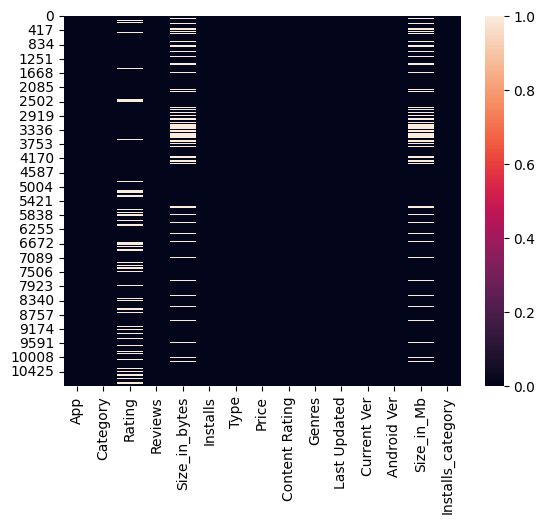

In [53]:
# plot missing values
sns.heatmap(data.isnull())
plt.show()


Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

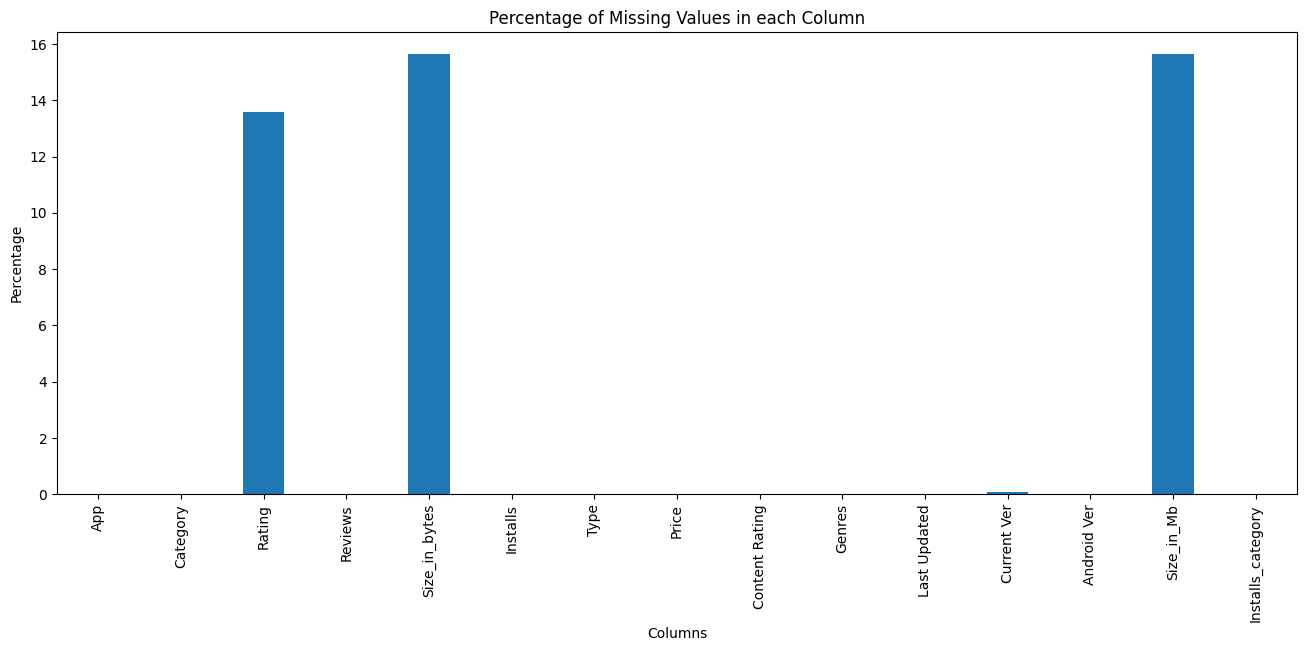

In [54]:
## Bar plot for missing values
# make figure size
plt.figure(figsize=(16, 6))

# plot the null values by their percentage in each column
missing_percentage = data.isnull().sum() / len(data) * 100
missing_percentage.plot(kind='bar')

# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')


Text(0.5, 1.0, 'Percentage of Missing Values in each Column without the rating column')

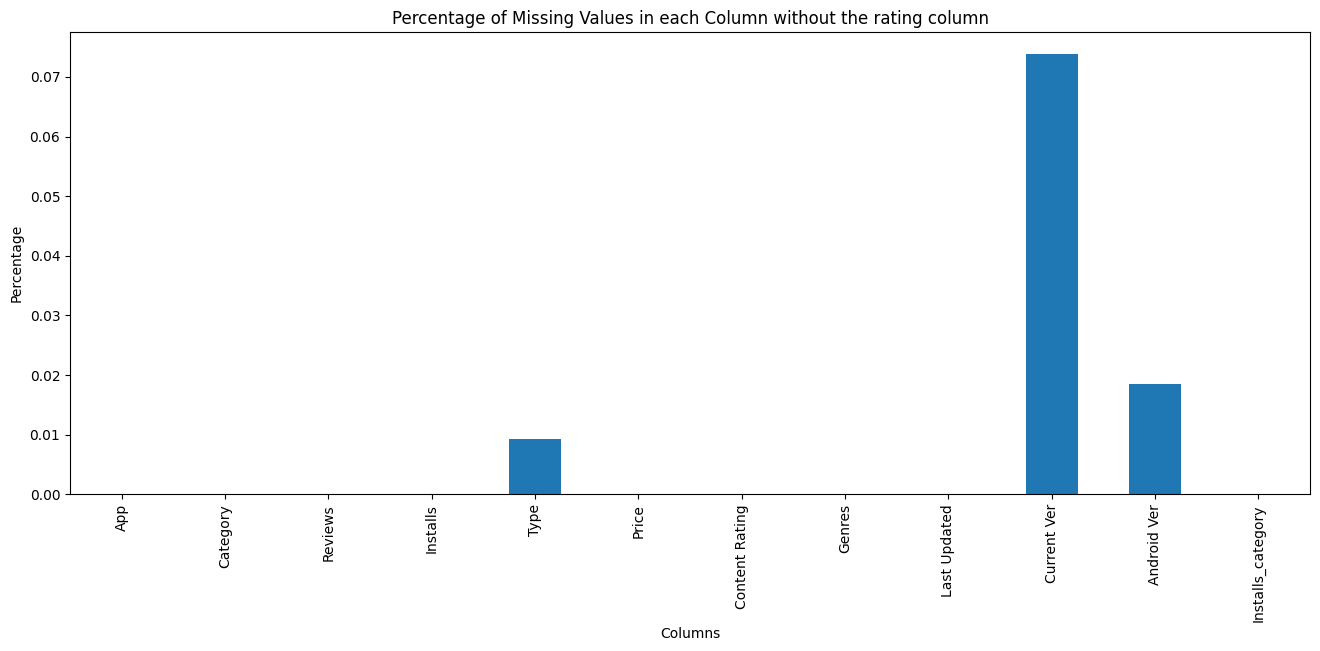

In [55]:
## Bar plot for missing values which are less than 1% of the total missing values
# make figure size
plt.figure(figsize=(16, 6))
missing_percentage[missing_percentage<1].plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column without the rating column')

In [56]:
data.isnull().sum().sort_values(ascending=False) # this will show the number of null values in each column in descending order


Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
App                     0
Category                0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Installs_category       0
dtype: int64

In [57]:
## this will show the percentage of null values in each column
(data.isnull().sum() / len(data) * 100).sort_values(ascending=False) 


Size_in_bytes        15.636531
Size_in_Mb           15.636531
Rating               13.597786
Current Ver           0.073801
Android Ver           0.018450
Type                  0.009225
App                   0.000000
Category              0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Genres                0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

# 2.3. Dealing with the missing values
---
We can not impute the Rating column as is is directly linked with the installation column. To test this Hypothesis we need to plot the Rating column with the Installs and Size columns and statistically test it using pearson correlation test.

In [58]:
data.describe()

,Rating,Size_in_bytes,Installs,Price,Size_in_Mb
count,9366.000000,9.145000e+03,1.084000e+04,10840.000000,9145.000000
mean,4.191757,2.256133e+07,1.546434e+07,1.027368,21.516165
std,0.515219,2.368637e+07,8.502936e+07,15.949703,22.589084
min,1.000000,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,1.048576e+08,1.000000e+09,400.000000,100.000000


,Rating,Reviews,Size_in_bytes,Installs,Price
Rating,1.000000,0.068141,0.083737,0.051355,-0.021903
Reviews,0.068141,1.000000,0.238214,0.643122,-0.009667
Size_in_bytes,0.083737,0.238214,1.000000,0.164787,-0.023007
Installs,0.051355,0.643122,0.164787,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.023007,-0.011689,1.000000


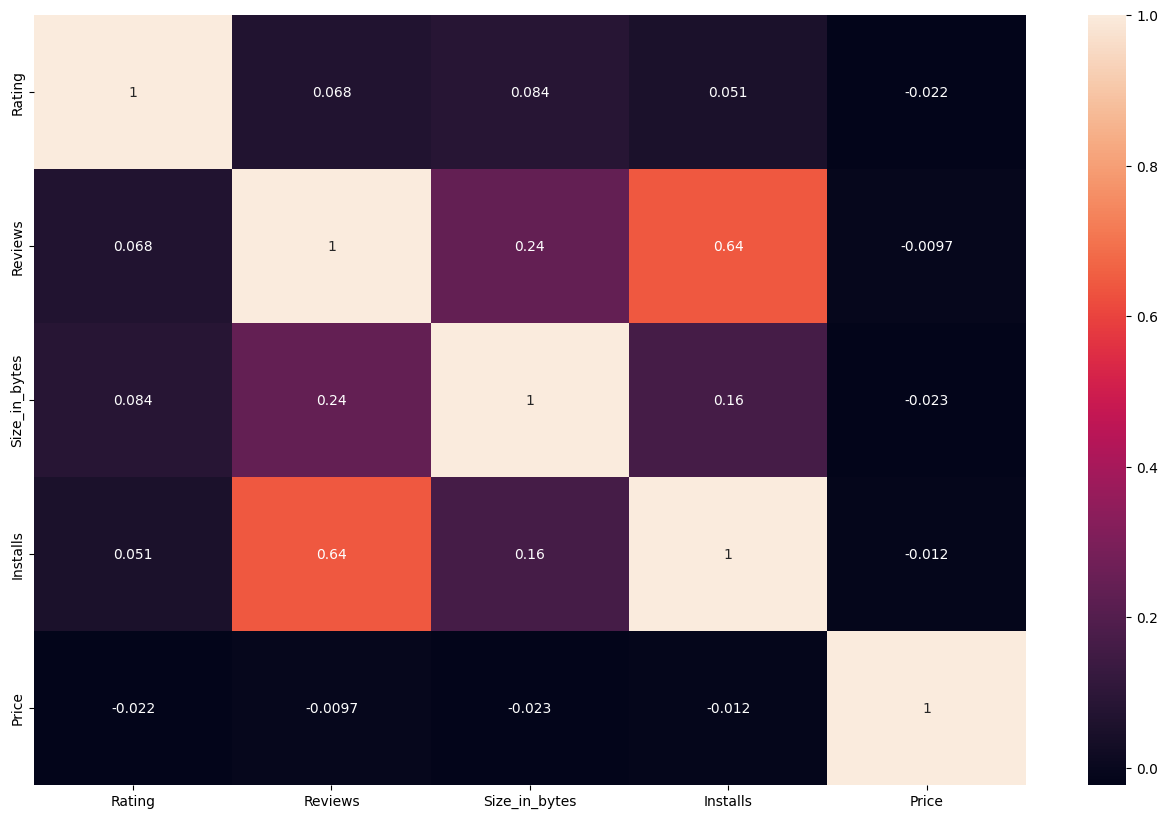

In [59]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size  
numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price'] # make a list of numeric columns
sns.heatmap(data[numeric_cols].corr(), annot=True) # plot the correlation matrix
# we can also calculate the correlation matrix using pandas
data[numeric_cols].corr() # this will show the correlation matrix

In [60]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

# this is to install scipy if you have not done it before
# pip install scipy 
from scipy import stats

# Ensure 'Reviews' and 'Installs' are numeric
data["Reviews"] = pd.to_numeric(data["Reviews"], errors="coerce")
data["Installs"] = pd.to_numeric(data["Installs"], errors="coerce")

# Remove rows containing NaN or infinite values
data_clean = data.dropna(subset=["Reviews", "Installs"])

# Calculate Pearson's R
pearson_r, _ = stats.pearsonr(data_clean["Reviews"], data_clean["Installs"])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")


Pearson's R between Reviews and Installs: 0.6431


In [61]:
## null values for all columns
data.isnull().sum()

App                     0
Category                0
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1695
Installs_category       0
dtype: int64

> Before going ahead, let's remove the rows with missing values in the Current Ver, Android Ver, Category, Type and Genres columns, as they are very less in number and will not affect our analysis.

In [62]:
# # length before removing null values
print(f"Length of the dataframe before removing null values: {len(data)}")

Length of the dataframe before removing null values: 10840


In [63]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
data.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [64]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(data)}")

Length of the dataframe after removing null values: 10829


We have removed 12 rows having null values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns.


In [65]:
# let's check the null values again
data.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_Mb           1694
Rating               1469
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

In [66]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [67]:
# use groupby function to find the trend of Rating in each Installs_category
data.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
No_Install,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


In [68]:
data.groupby('Installs_category')['Rating'].count()

Installs_category
No_Install               0
Very low                81
Low                   1278
Moderate              1440
More than moderate    1616
High                  2113
Very High             2004
Top Notch              828
Name: Rating, dtype: int64

In [69]:
data[["Rating","Installs_category"]].head()

,Rating,Installs_category
0,4.1,Moderate
1,3.9,High
2,4.7,Very High
3,4.5,Top Notch
4,4.3,More than moderate


In [70]:
data.groupby('Installs_category')['Rating'].mean()

Installs_category
No_Install                 NaN
Very low              4.637037
Low                   4.170970
Moderate              4.035417
More than moderate    4.093255
High                  4.207525
Very High             4.287076
Top Notch             4.374396
Name: Rating, dtype: float64

In [71]:
# in which Install_category the Rating has NaN values
data['Installs_category'].loc[data['Rating'].isnull()].value_counts()

Installs_category
Low                   880
Very low              453
Moderate               88
More than moderate     31
No_Install             14
High                    3
Very High               0
Top Notch               0
Name: count, dtype: int64

Text(7, 3.5, 'Null values: 0')

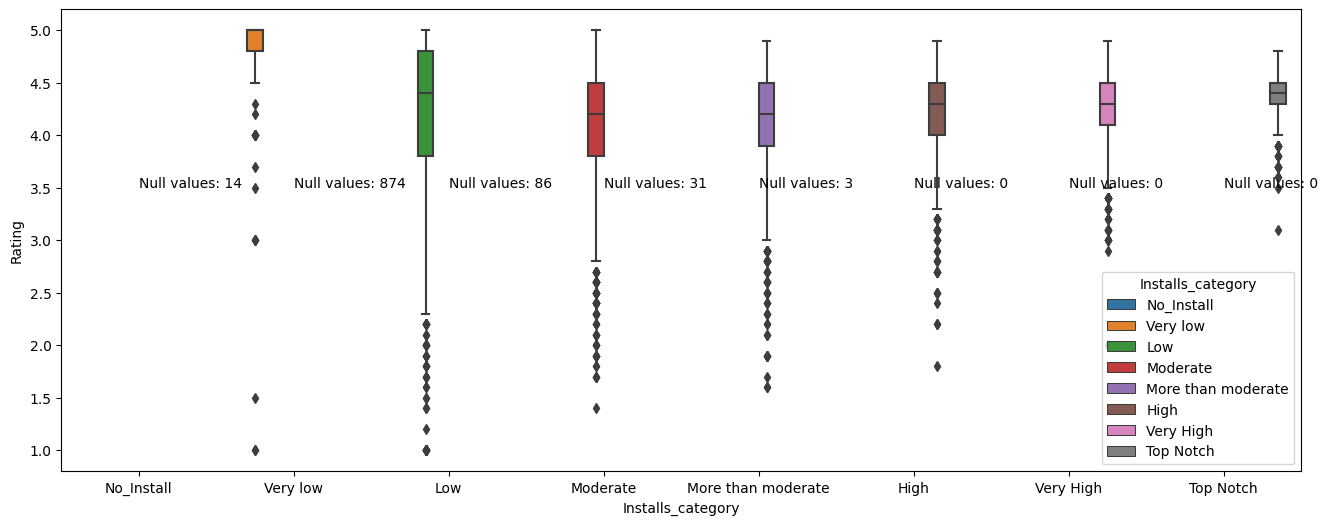

In [72]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=data) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

In [73]:
# before imputing the number of missing values in the 'Rating' column
data["Rating"].isnull().sum()

1469

In [74]:
# Mean values for each 'Installs_category'
mean_values = {
    'No_Install': 0.0,
    'Very low': 4.637037,
    'Low': 4.170970,
    'Moderate': 4.035417,
    'More than moderate': 4.093255,
    'High': 4.207525,
    'Very High': 4.287076,
    'Top Notch': 4.374396
}

In [75]:
# Function to fill missing 'Rating' based on 'Installs_category'
def fill_rating(row):
    if pd.isnull(row['Rating']):
        category = row['Installs_category']
        return mean_values.get(category, row['Rating'])
    return row['Rating']

In [76]:
# Apply the function to fill missing ratings
data['Rating'] = data.apply(fill_rating, axis=1)

In [77]:
## before imputing the number of missing values in the 'Rating' column
data["Rating"].isnull().sum()

0

- > There are no Null values in Reviews


<Axes: xlabel='Installs_category', ylabel='Reviews'>

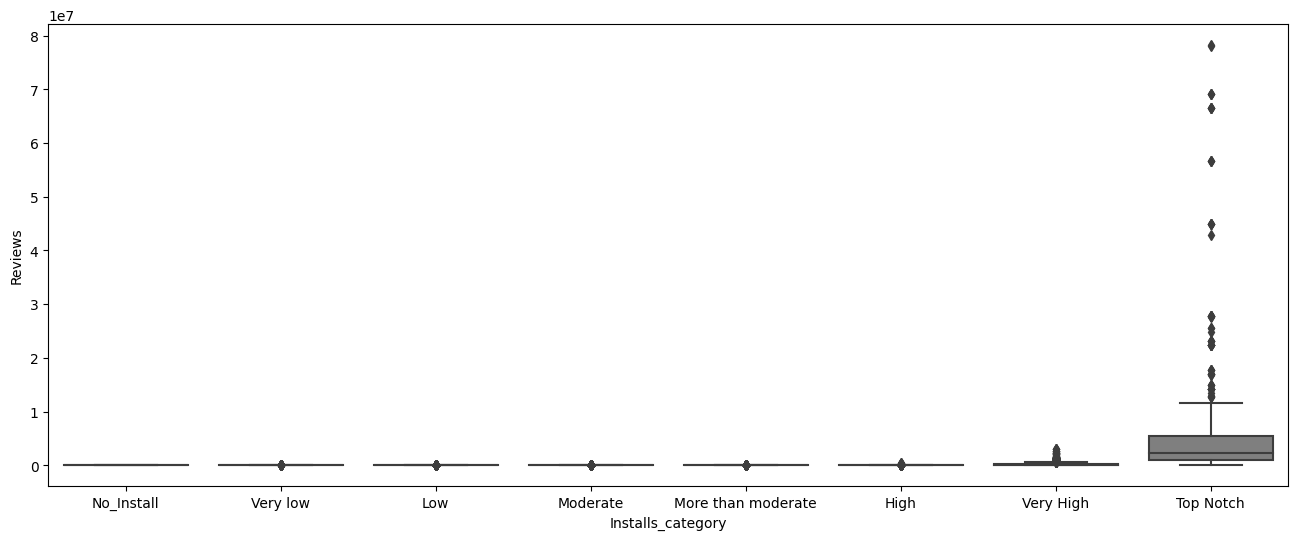

In [78]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= 'Reviews', data=data) # plot the boxplot

- The data looks really imbalance, let's normalize the data using log transformation


<Axes: xlabel='Installs_category', ylabel='Reviews'>

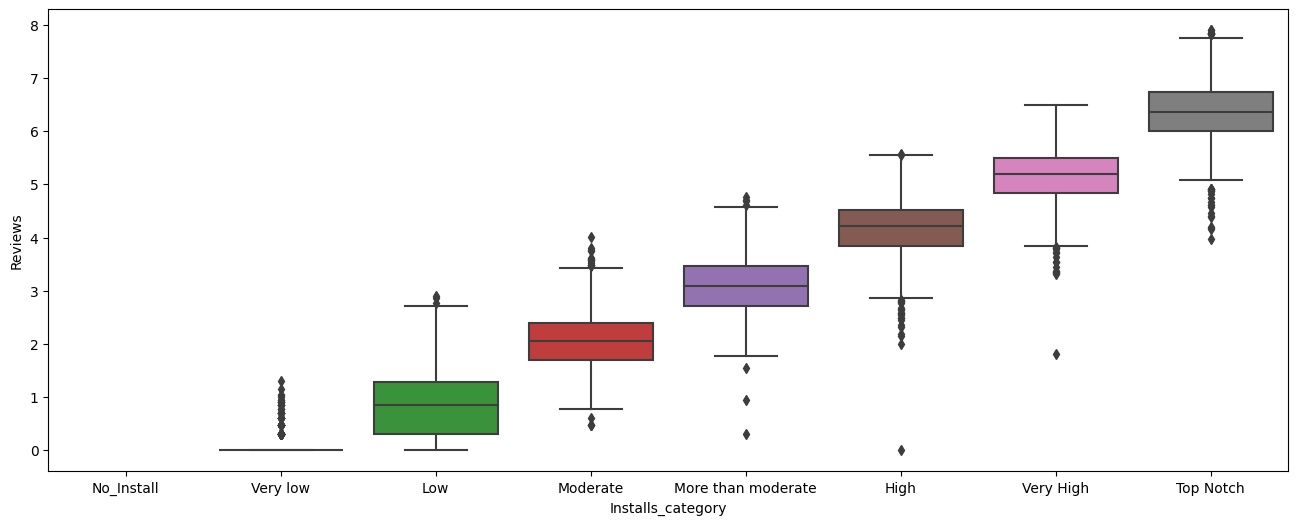

In [79]:
# let's plot the same plots for Reviews column as well
#Without log transformation, the large range of the data would make it hard to visualize lower categories like "No Install," "Very Low," etc., 
# as their values are close to zero compared to the large numbers in the "Top Notch" category. 
# A log scale makes it easier to compare data across categories that have both small and large values.
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= np.log10(data['Reviews']), data=data) # plot the boxplot

- We also draw the scatter plot of the Rating and Review columns with the Installs column


<Axes: xlabel='Rating', ylabel='Reviews'>

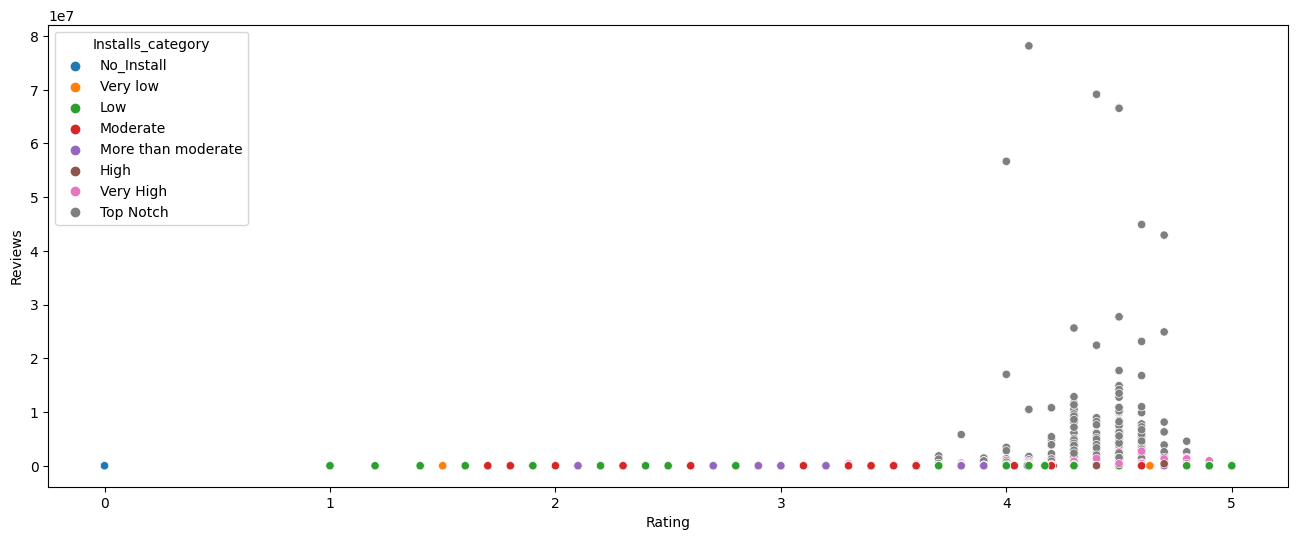

In [80]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=data) # plot the scatter plot

- It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

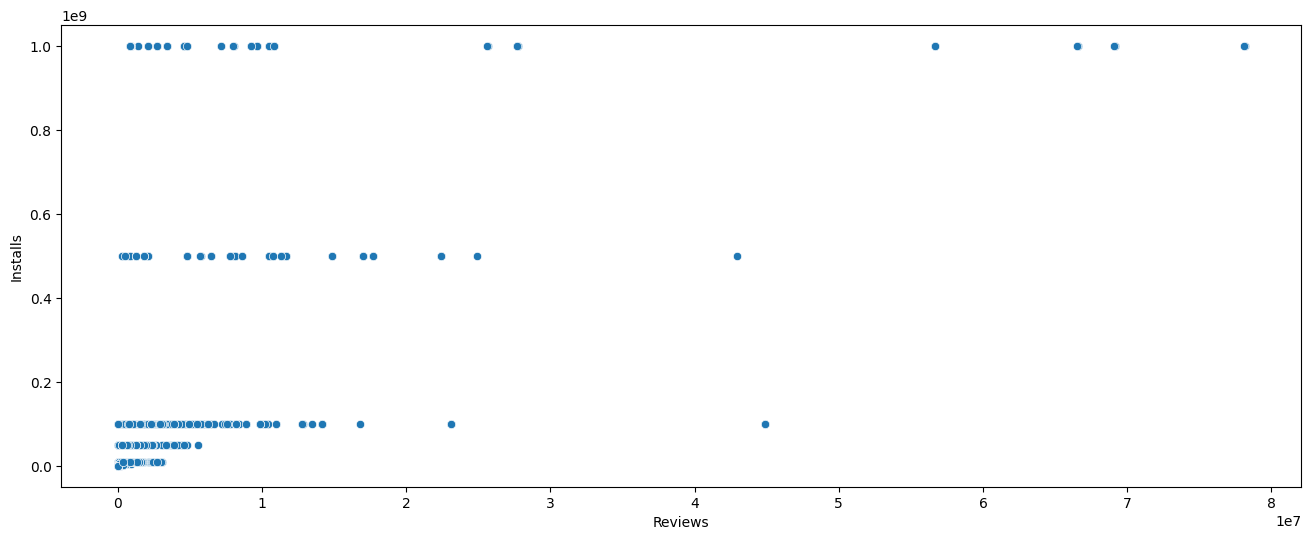

In [81]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=data) # plot the scatter plot

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation.


<Axes: xlabel='Reviews', ylabel='Installs'>

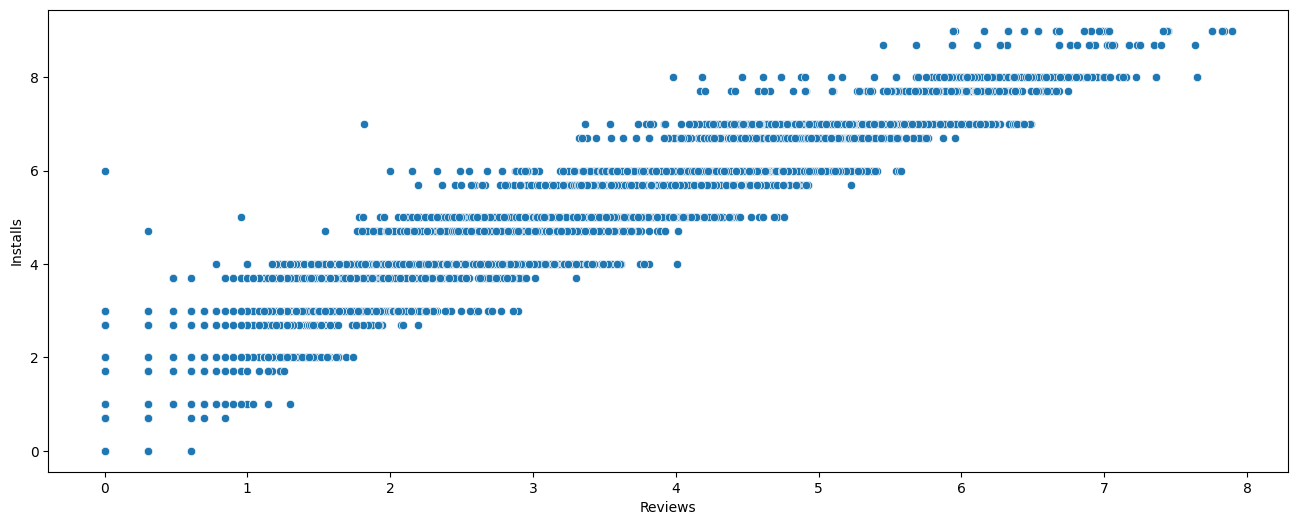

In [82]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(data['Reviews']), y=np.log10(data['Installs']), data=data) # plot the scatter plot

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

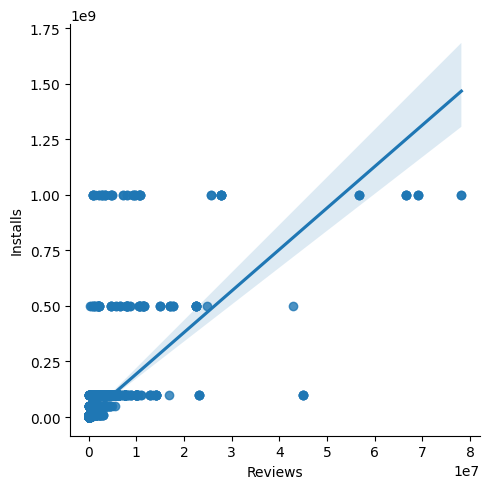

In [83]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=data) # plot the scatter plot with trend line

- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.


# Observation
-We can see that most of the null values from Rating column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

> But wait, we have to check for the duplicates as well, as they can affect our analysis

- # Duplicates
- Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.

- If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis.

- Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points.

- It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.

In [84]:
# find duplicate if any
data.duplicated().sum()

483

- This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [85]:
# finding how many duplicate values are there in the "App" column
data["App"].duplicated().sum()

1181

- There are 1181 duplicate app names

- let's check for number of duplicates in each column using a for loop and printing the output





In [86]:
# let's check for number of duplicates
for col_name in data.columns:
    print(f"Number of duplicates in {col_name} column are: {data[col_name].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10784
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size_in_bytes column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 7998
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Size_in_Mb column are: 10373
Number of duplicates in Installs_category column are: 10821


- This means that the only better way to find duplicates is to check for whole data



In [87]:
# number of the duplicate values in the dataset
print(f"Number of duplicates in dataset are: {data.duplicated().sum()}")

Number of duplicates in dataset are: 483


In [88]:
# printing the duplicate values
data[data['App'].duplicated(keep=False)].sort_values(by='App')

data[data.duplicated()].head(10)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up,NaN,Very High
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device,NaN,Very High
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up,NaN,Very High
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,38797312.0,10000000,Free,0.0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up,37.0,Very High
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up,NaN,High
265,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device,NaN,Very High
266,Zenefits,BUSINESS,4.2,296,14680064.0,50000,Free,0.0,Everyone,Business,"June 15, 2018",3.2.1,4.1 and up,14.0,More than moderate
267,Google Ads,BUSINESS,4.3,29313,20971520.0,5000000,Free,0.0,Everyone,Business,"July 30, 2018",1.12.0,4.0.3 and up,20.0,Very High
268,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up,NaN,Very High
269,Slack,BUSINESS,4.4,51507,NaN,5000000,Free,0.0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device,NaN,Very High


1. data['App'].duplicated(keep=False):
This part checks for duplicate values in the 'App' column.
The parameter keep=False ensures that all occurrences of a duplicate value are marked as True (not just the second or later occurrence). By default, only subsequent duplicates are marked, but keep=False flags all duplicates, including the first occurrence.
So, it creates a Boolean Series where True marks all rows with duplicate values in the 'App' column, and False marks the unique values.

2. data[data['App'].duplicated(keep=False)]:
This filters the data DataFrame, returning only the rows where the 'App' column contains duplicate values. The result is a new DataFrame with all rows that have duplicates in the 'App' column.
3. .sort_values(by='App'):
This part sorts the filtered DataFrame by the values in the 'App' column. The goal is to group together rows that have the same duplicate value, making it easier to spot the duplicates.

In [89]:
# remove the duplicates
data.drop_duplicates(inplace=True)

In [90]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {data.shape[0]}")

Number of rows after removing duplicates: 10346


- Now we have removed 483 duplicates from the dataset. and have 9584 rows left.


# Insights from data

Q1. Which category has the highest number of apps?

In [91]:
# which category has highest number of apps
data['Category'].value_counts().head(15) # this will show the top 10 categories with highest number of apps

Category
FAMILY                1939
GAME                  1121
TOOLS                  841
BUSINESS               427
MEDICAL                408
PRODUCTIVITY           407
PERSONALIZATION        386
LIFESTYLE              373
COMMUNICATION          366
FINANCE                360
SPORTS                 351
PHOTOGRAPHY            322
HEALTH_AND_FITNESS     306
SOCIAL                 280
NEWS_AND_MAGAZINES     264
Name: count, dtype: int64

Q2. Which category has the highest number of installs?


In [92]:
## category with highest number of Installs
data.groupby('Category')['Installs'].sum().sort_values(ascending=False).head(15)

Category
GAME                   31544024415
COMMUNICATION          24152276251
SOCIAL                 12513867902
PRODUCTIVITY           12463091369
TOOLS                  11452271905
FAMILY                 10041632405
PHOTOGRAPHY             9721247655
TRAVEL_AND_LOCAL        6361887146
VIDEO_PLAYERS           6222002720
NEWS_AND_MAGAZINES      5393217760
SHOPPING                2573348785
ENTERTAINMENT           2455660000
PERSONALIZATION         2074483782
BOOKS_AND_REFERENCE     1916468576
SPORTS                  1528574498
Name: Installs, dtype: int64

Q3. Which category has the highest number of reviews?


In [93]:
## Category with highest number of Reviews
data.groupby("Category")["Reviews"].sum().sort_values(ascending=False).head(15)

Category
GAME                  1415536650
COMMUNICATION          601273552
SOCIAL                 533576829
FAMILY                 396771746
TOOLS                  273181033
PHOTOGRAPHY            204297410
VIDEO_PLAYERS          110380188
PRODUCTIVITY           102554498
SHOPPING                94931162
PERSONALIZATION         75192744
SPORTS                  65322708
TRAVEL_AND_LOCAL        55565160
ENTERTAINMENT           47570716
NEWS_AND_MAGAZINES      38245873
HEALTH_AND_FITNESS      30845186
Name: Reviews, dtype: int64

Q4. Which category has the highest rating?


In [94]:
## Category with highest average Rating
data.groupby("Category")["Rating"].mean().sort_values(ascending=False).head(30)

Category
EVENTS                 4.394346
EDUCATION              4.373794
BOOKS_AND_REFERENCE    4.358435
PERSONALIZATION        4.322099
ART_AND_DESIGN         4.298885
GAME                   4.281926
HEALTH_AND_FITNESS     4.273890
PARENTING              4.259759
SHOPPING               4.253376
SPORTS                 4.253041
WEATHER                4.249133
BEAUTY                 4.244167
AUTO_AND_VEHICLES      4.231531
SOCIAL                 4.230009
PRODUCTIVITY           4.218895
MEDICAL                4.205945
FAMILY                 4.197641
FOOD_AND_DRINK         4.188011
PHOTOGRAPHY            4.186570
BUSINESS               4.178729
COMMUNICATION          4.177694
HOUSE_AND_HOME         4.169548
LIBRARIES_AND_DEMO     4.168599
COMICS                 4.154404
NEWS_AND_MAGAZINES     4.138558
ENTERTAINMENT          4.136036
LIFESTYLE              4.123480
FINANCE                4.117404
TRAVEL_AND_LOCAL       4.098970
TOOLS                  4.080989
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

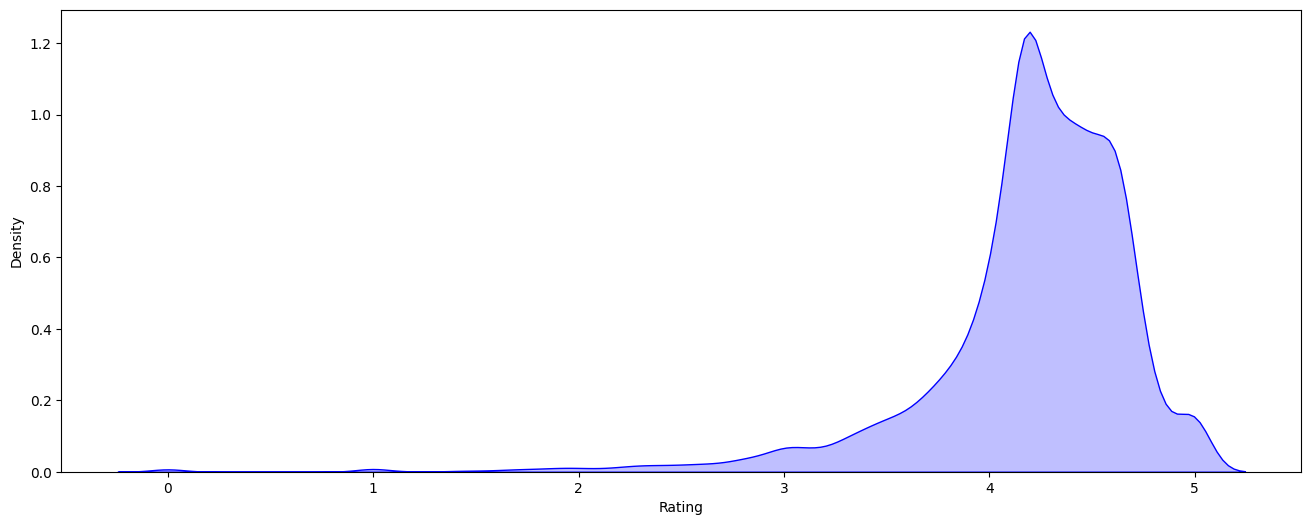

In [95]:
# plot the rating distribution
plt.figure(figsize=(16, 6)) # make figure size
sns.kdeplot(data['Rating'], color="blue", shade=True) # plot the distribution plot

Q4. Number of different Ratings for each category.

In [96]:
data.groupby("Category")["Rating"].value_counts()

Category             Rating  
ART_AND_DESIGN       4.700000     13
                     4.400000      8
                     4.100000      7
                     4.200000      7
                     4.800000      5
                     4.300000      4
                     4.500000      4
                     3.800000      3
                     4.000000      3
                     4.600000      3
                     3.900000      2
                     0.000000      1
                     3.400000      1
                     4.035417      1
                     4.093255      1
                     5.000000      1
AUTO_AND_VEHICLES    4.600000     11
                     4.000000      9
                     4.637037      8
                     4.200000      7
                     4.300000      7
                     3.900000      6
                     4.400000      6
                     4.500000      5
                     4.800000      5
                     4.900000      5
        

Q5. What is the number of paid apps and unpaid apps?

In [97]:
data["Type"].value_counts()

Type
Free    9584
Paid     762
Name: count, dtype: int64

<Axes: xlabel='Type', ylabel='Installs'>

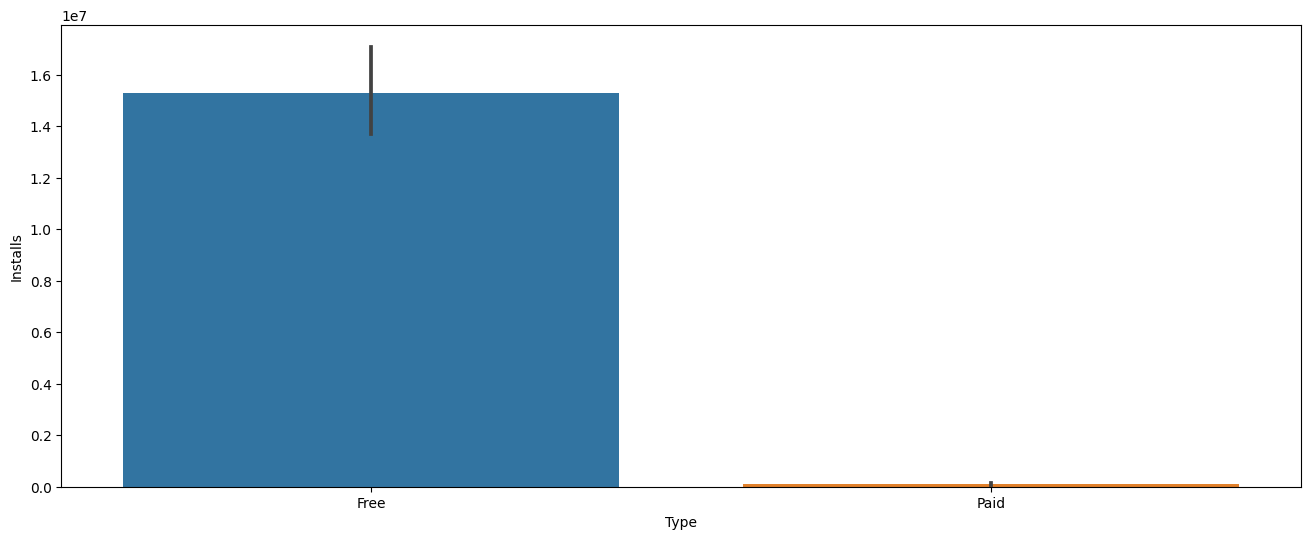

In [98]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Type', y='Installs', data=data) # plot the bar plot

Q6. How many Free and Paid softwares got installed?

In [99]:
data.groupby("Type")["Installs"].sum()

Type
Free    146561162546
Paid        69174871
Name: Installs, dtype: int64

<Axes: xlabel='Installs', ylabel='Price'>

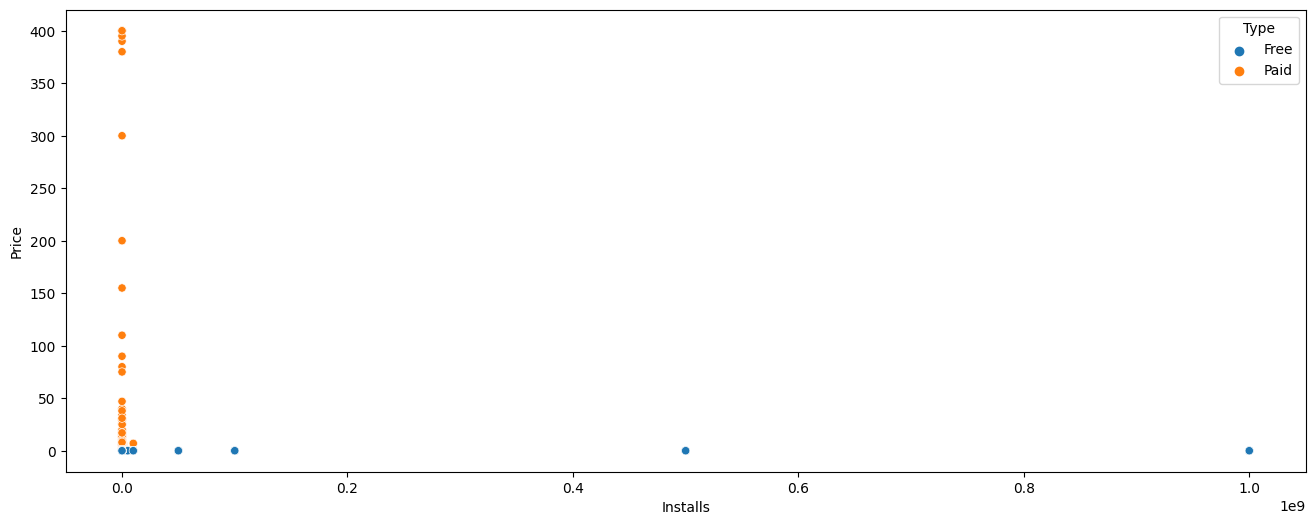

In [100]:
# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=data) # plot the scatter plot

<Figure size 1600x600 with 0 Axes>

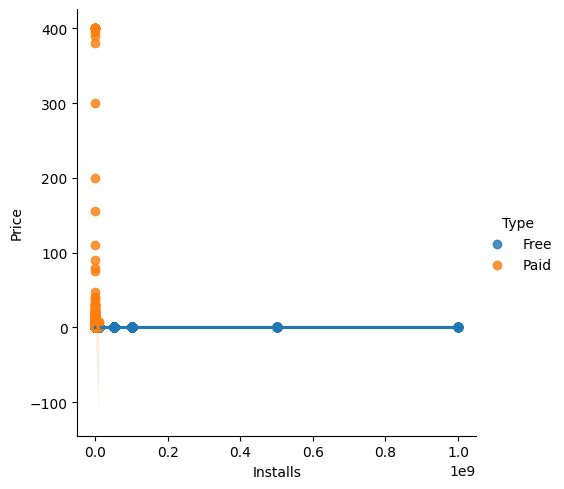

In [101]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Installs', y='Price',hue='Type', data=data) # plot the scatter plot with trend line

Q7. What are mean of the sizes of the softwares based on Installs_category?

In [102]:
data.groupby("Installs_category")["Size_in_Mb"].mean()

Installs_category
No_Install            13.028571
Very low              13.943433
Low                   13.975488
Moderate              15.053384
More than moderate    19.618806
High                  25.629958
Very High             32.175802
Top Notch             47.226087
Name: Size_in_Mb, dtype: float64

<Axes: xlabel='Installs_category', ylabel='Size_in_Mb'>

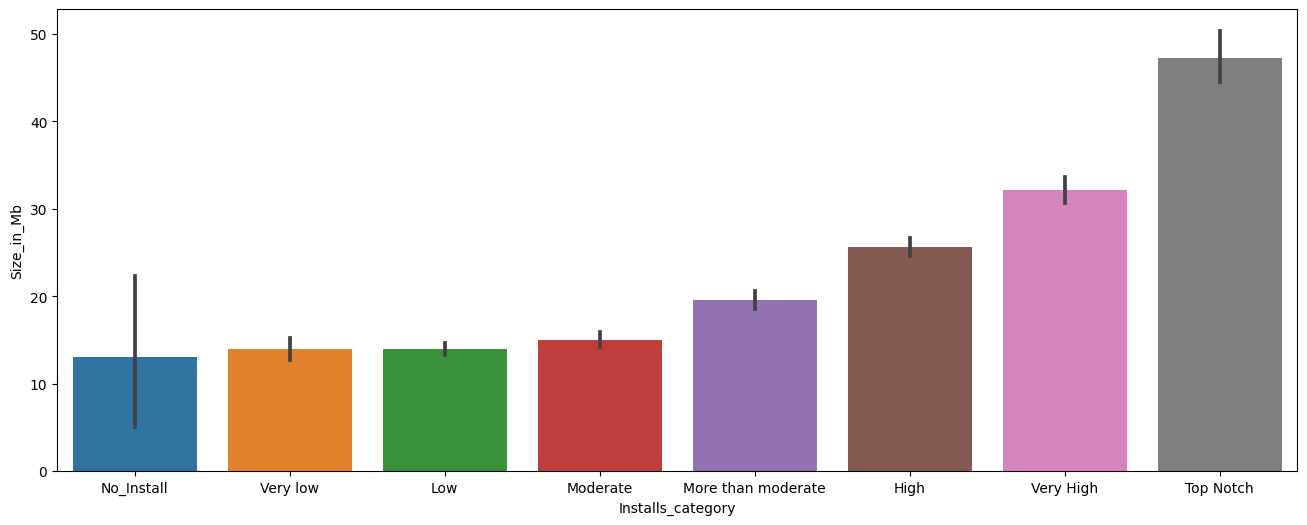

In [103]:
# Check if there is any impact of size on installs
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Installs_category', y='Size_in_Mb', data=data) # plot the bar plot

Q8. Which content rating is most popular in installs


In [104]:
data['Content Rating'].value_counts() # this will show the value counts of each content rating

Content Rating
Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

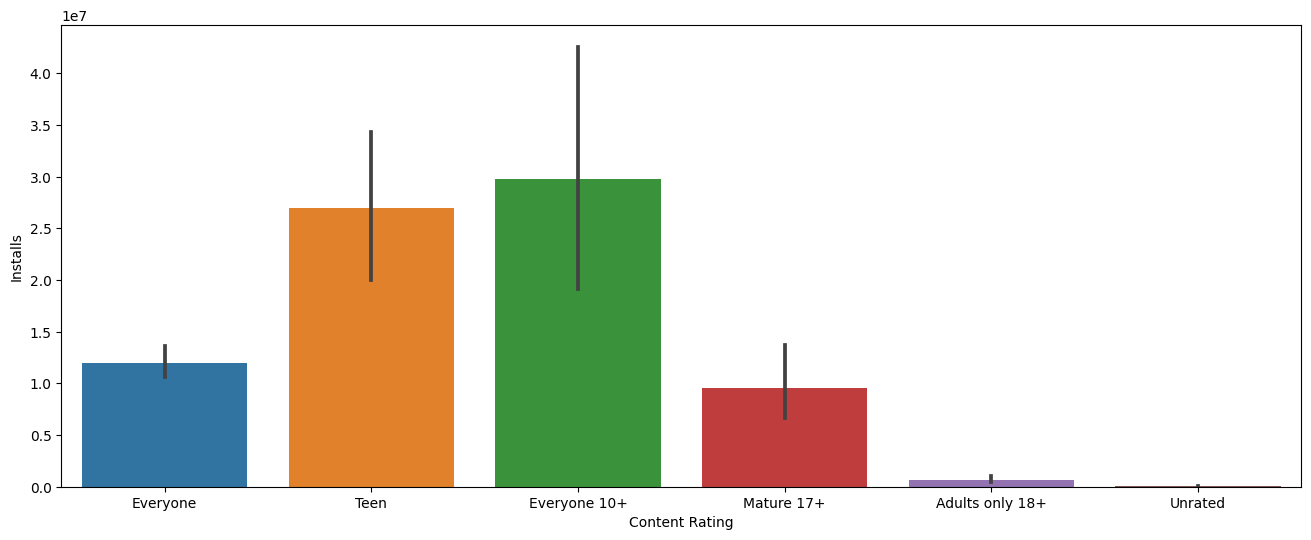

In [105]:
# plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=data) # plot the bar plot

Q9.How many apps are there in Everyone content rating?


In [106]:
data['Category'].loc[data['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1498
TOOLS                   833
GAME                    595
BUSINESS                412
PRODUCTIVITY            396
MEDICAL                 390
FINANCE                 355
LIFESTYLE               337
COMMUNICATION           325
PERSONALIZATION         318
SPORTS                  318
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        230
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      168
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

Q10. How many apps got 5 rating?

In [107]:
len(data[data["Rating"]==5.0])


271

Q11. How many paid apps got 5 rating?

In [108]:
len(data[(data["Rating"] == 5.0) & (data["Type"] == "Paid")])


28

Q12. Give the top rated 10 apps in Paid category

In [109]:
# Filter for paid apps, drop NaN ratings, and get the top 10 rated apps
data[data['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(10)


,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
7466,211:CK,GAME,5.0,8,39845888.0,10,Paid,0.99,Teen,Arcade,"April 11, 2018",1.3,4.1 and up,38.000000,Very low
9056,Santa's Monster Shootout DX,GAME,5.0,4,34603008.0,50,Paid,1.99,Teen,Action,"August 15, 2013",1.05,2.2 and up,33.000000,Low
7204,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,28311552.0,100,Paid,4.99,Everyone,Education,"March 28, 2018",1.5.2,4.1 and up,27.000000,Low
7100,CA Speakers,LIFESTYLE,5.0,12,1258291.2,100,Paid,0.99,Teen,Lifestyle,"March 25, 2014",1.0,3.0 and up,1.200000,Low
8287,AC DC Power Monitor,LIFESTYLE,5.0,1,1258291.2,10,Paid,3.04,Everyone,Lifestyle,"May 29, 2016",1.2,2.3 and up,1.200000,Very low
8526,DL Image Manager,PRODUCTIVITY,5.0,2,1782579.2,10,Paid,0.99,Everyone,Productivity,"July 29, 2018",1.0.5,4.0 and up,1.700000,Very low
3957,ADS-B Driver,TOOLS,5.0,2,6606028.8,100,Paid,1.99,Everyone,Tools,"May 15, 2018",1.19,4.4 and up,6.300000,Low
5263,AJ Blue Icon Pack,PERSONALIZATION,5.0,4,32505856.0,50,Paid,0.99,Everyone,Personalization,"April 27, 2018",1.1,4.1 and up,31.000000,Low
5482,meStudying: AP English Lit,FAMILY,5.0,1,670720.0,10,Paid,4.99,Everyone,Education,"August 31, 2013",1.3,2.0.1 and up,0.639648,Very low
2262,Super Hearing Secret Voices Recorder PRO,MEDICAL,5.0,3,24117248.0,100,Paid,2.99,Everyone,Medical,"April 20, 2018",1.0,4.1 and up,23.000000,Low


<Axes: xlabel='App', ylabel='Rating'>

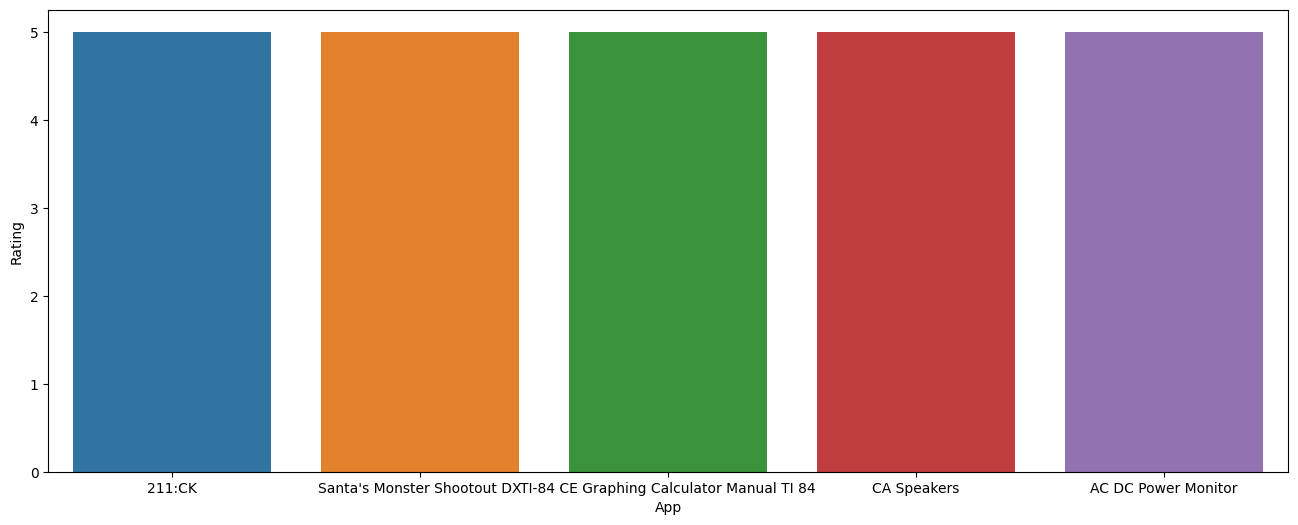

In [110]:
# plot top 5 rated paid apps
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=data[data['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

Q12. How many Free apps got 5 rating?

In [111]:
len(data[(data["Rating"] == 5.0) & (data["Type"] == "Free")])


243

<Axes: xlabel='App', ylabel='Rating'>

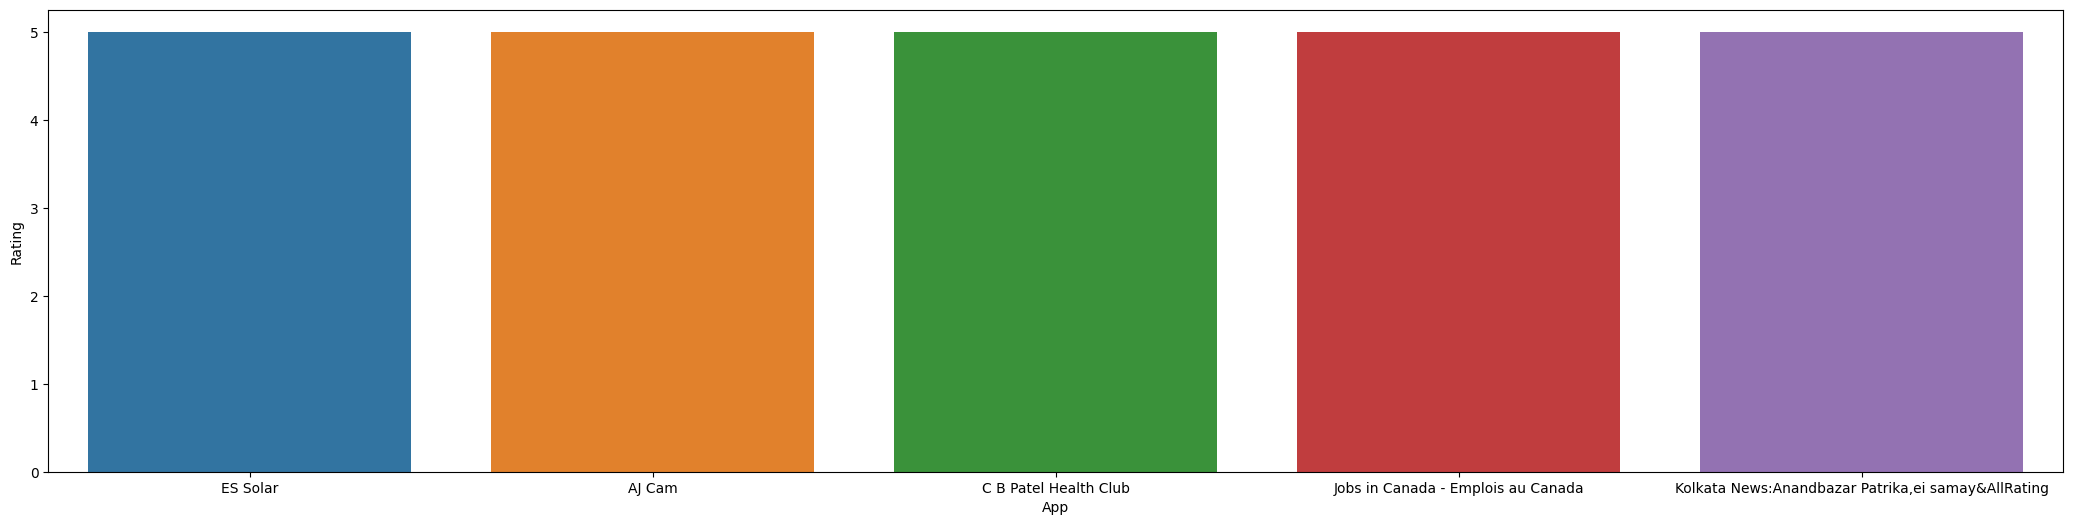

In [112]:
# plot top 5 rated paid apps
plt.figure(figsize=(26, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=data[data['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

Q13. Give the top rated 10 apps in Free category

In [113]:
data[data['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)


,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
9815,ES Solar,BUSINESS,5.0,3,4928307.2,100,Free,0.0,Everyone,Business,"May 17, 2018",1.2,4.1 and up,4.7,Low
5230,AJ Cam,PHOTOGRAPHY,5.0,44,2936012.8,100,Free,0.0,Everyone,Photography,"January 23, 2018",1.0,4.1 and up,2.8,Low
7131,C B Patel Health Club,HEALTH_AND_FITNESS,5.0,5,14680064.0,100,Free,0.0,Everyone,Health & Fitness,"July 2, 2018",1.0.1,4.4 and up,14.0,Low
5685,Jobs in Canada - Emplois au Canada,BUSINESS,5.0,2,14680064.0,1000,Free,0.0,Teen,Business,"August 5, 2018",1.1,4.2 and up,14.0,Low
9444,"Kolkata News:Anandbazar Patrika,ei samay&AllRa...",NEWS_AND_MAGAZINES,5.0,10,5242880.0,100,Free,0.0,Everyone,News & Magazines,"July 14, 2018",1.0,4.0.3 and up,5.0,Low


Q14. What are the top 5 FREE apps with highest number of reviews?



In [114]:
data[data['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)


,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,NaN,Top Notch
2604,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device,NaN,Top Notch


<Axes: xlabel='App', ylabel='Reviews'>

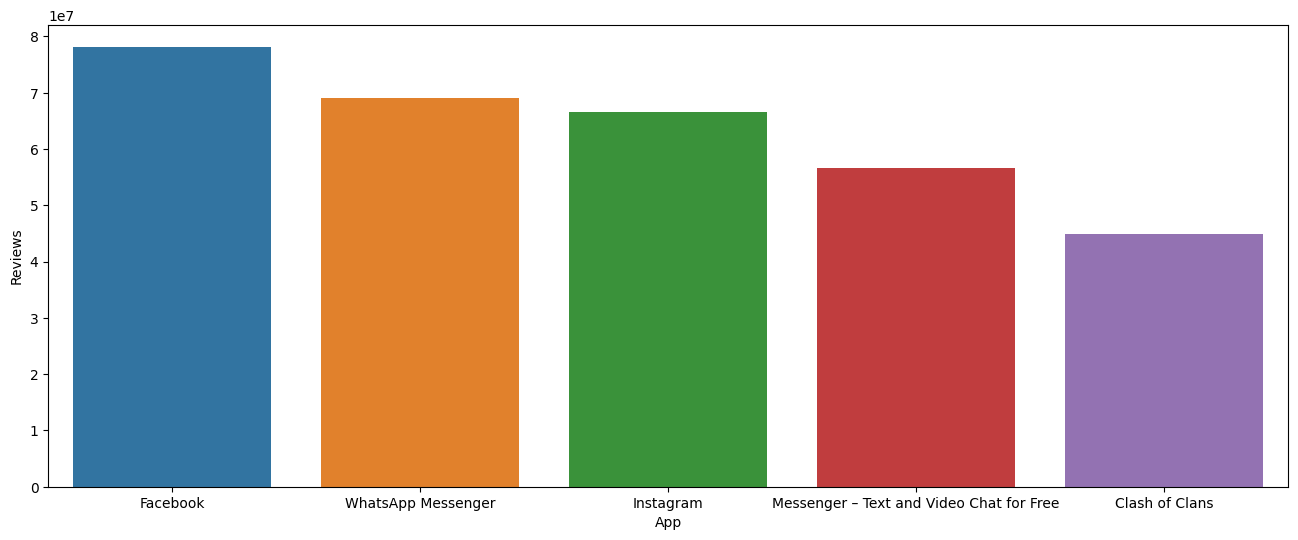

In [115]:
# Plot top 10 Paid apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=data[data['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(10)) # plot the bar plot

Q15. What are the top 5 Paid apps with highest number of reviews?


In [116]:
data[data['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)


,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
2241,Minecraft,FAMILY,4.5,2376564,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,NaN,Very High
4347,Minecraft,FAMILY,4.5,2375336,NaN,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,NaN,Very High
4034,Hitman Sniper,GAME,4.6,408292,30408704.0,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,29.0,Very High
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,27262976.0,1000000,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,26.0,High
8860,Bloons TD 5,FAMILY,4.6,190086,98566144.0,1000000,Paid,2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,94.0,High


<Axes: xlabel='App', ylabel='Reviews'>

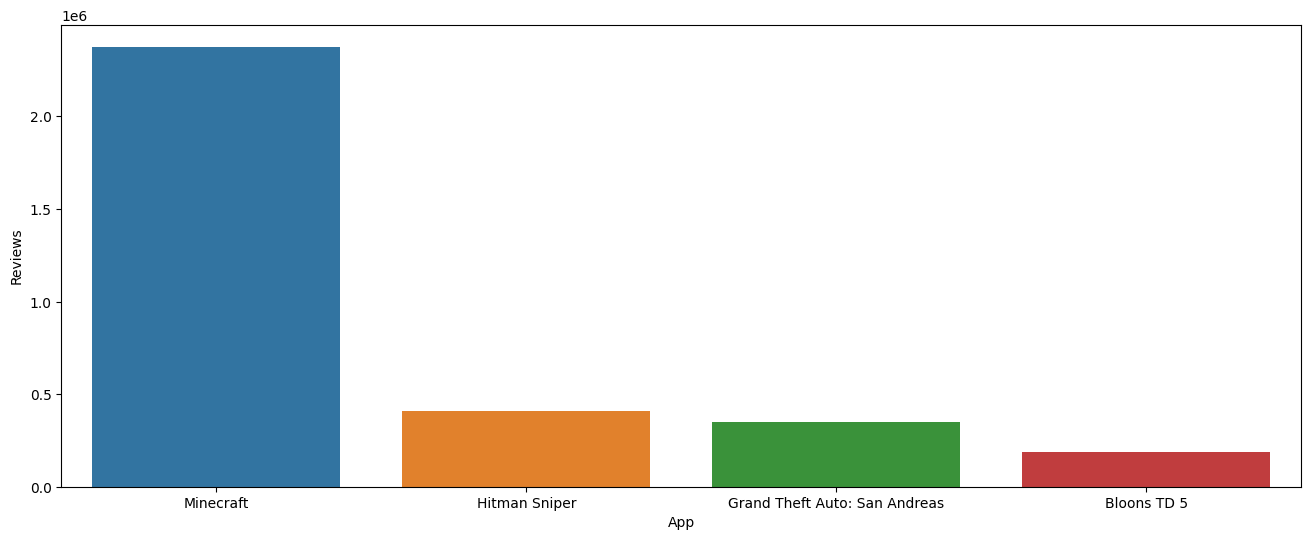

In [117]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=data[data['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

Q16. How does the distribution of app ratings vary across different categories?

Text(0, 0.5, 'Rating')

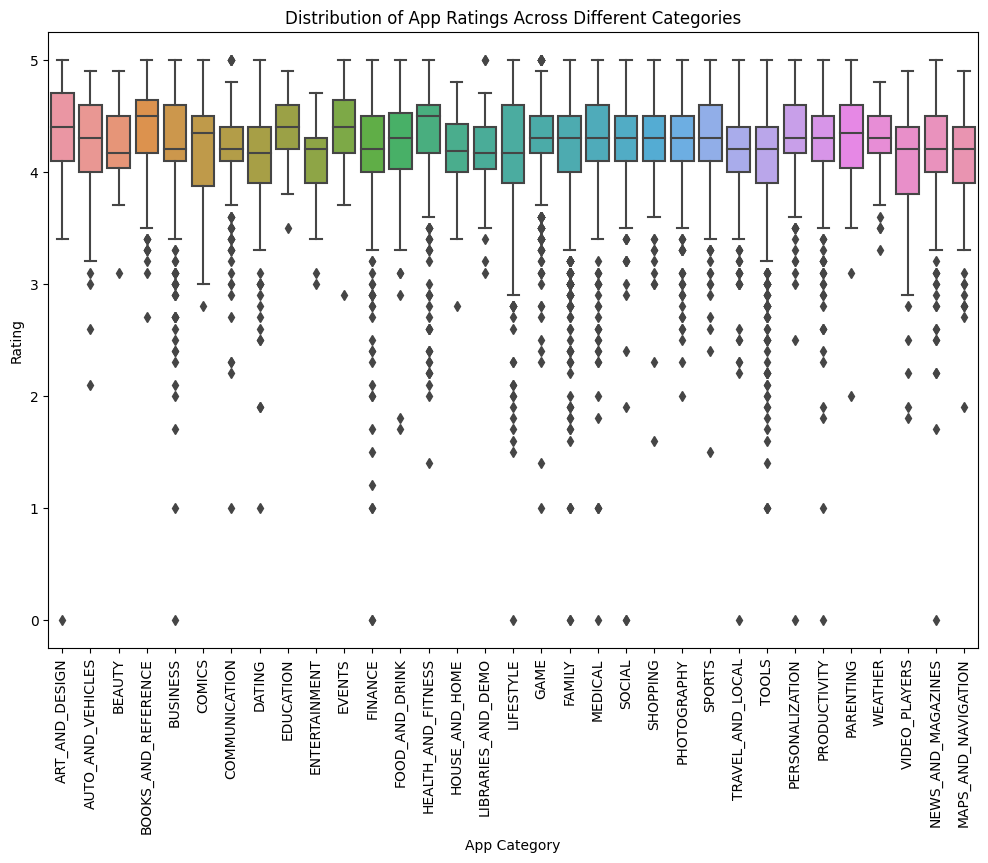

In [118]:
# Filter out rows with missing ratings or categories (if any)
data_cleaned = data.dropna(subset=['Rating', 'Category'])

# Set the size of the plot for better readability
plt.figure(figsize=(12, 8))

# Create a box plot to show the distribution of ratings by category
sns.boxplot(x='Category', y='Rating', data=data_cleaned)
plt.xticks(rotation=90)  # Rotate the category labels for readability
plt.title('Distribution of App Ratings Across Different Categories')
plt.xlabel('App Category')
plt.ylabel('Rating')

Q17. Which categories have the highest average app ratings?

In [119]:
data.groupby("Category")["Rating"].mean().sort_values(ascending=False)

Category
EVENTS                 4.394346
EDUCATION              4.373794
BOOKS_AND_REFERENCE    4.358435
PERSONALIZATION        4.322099
ART_AND_DESIGN         4.298885
GAME                   4.281926
HEALTH_AND_FITNESS     4.273890
PARENTING              4.259759
SHOPPING               4.253376
SPORTS                 4.253041
WEATHER                4.249133
BEAUTY                 4.244167
AUTO_AND_VEHICLES      4.231531
SOCIAL                 4.230009
PRODUCTIVITY           4.218895
MEDICAL                4.205945
FAMILY                 4.197641
FOOD_AND_DRINK         4.188011
PHOTOGRAPHY            4.186570
BUSINESS               4.178729
COMMUNICATION          4.177694
HOUSE_AND_HOME         4.169548
LIBRARIES_AND_DEMO     4.168599
COMICS                 4.154404
NEWS_AND_MAGAZINES     4.138558
ENTERTAINMENT          4.136036
LIFESTYLE              4.123480
FINANCE                4.117404
TRAVEL_AND_LOCAL       4.098970
TOOLS                  4.080989
VIDEO_PLAYERS          4.077823

Q18. What is the relationship between the number of reviews and app ratings?

In [120]:
# Calculate the correlation coefficient between 'Reviews' and 'Rating'
correlation = data['Reviews'].corr(data['Rating'])
print(f"Correlation coefficient between number of reviews and app ratings: {correlation:.2f}")

Correlation coefficient between number of reviews and app ratings: 0.06


- We can see, there is no direct correlation.

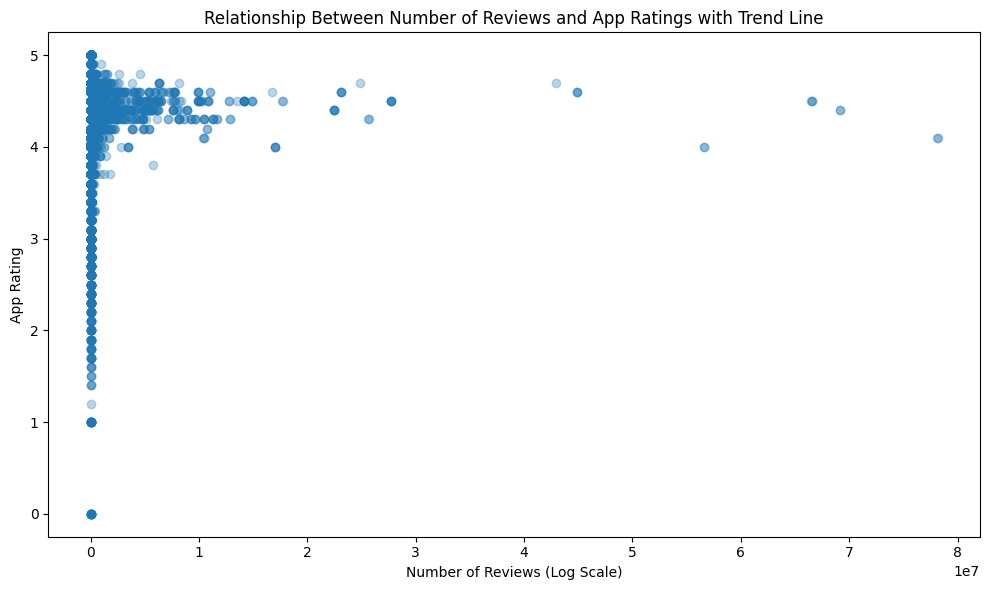

In [121]:
# Create a scatter plot with a trend line (regression line) using seaborn
plt.figure(figsize=(10, 6))

# Use seaborn's regplot to create the plot with a trend line
sns.regplot(x='Reviews', y='Rating', data=data, scatter_kws={'alpha':0.3}, line_kws={'color':'red'}, logx=True)

plt.title('Relationship Between Number of Reviews and App Ratings with Trend Line')
plt.xlabel('Number of Reviews (Log Scale)')
plt.ylabel('App Rating')

plt.tight_layout()
plt.show()

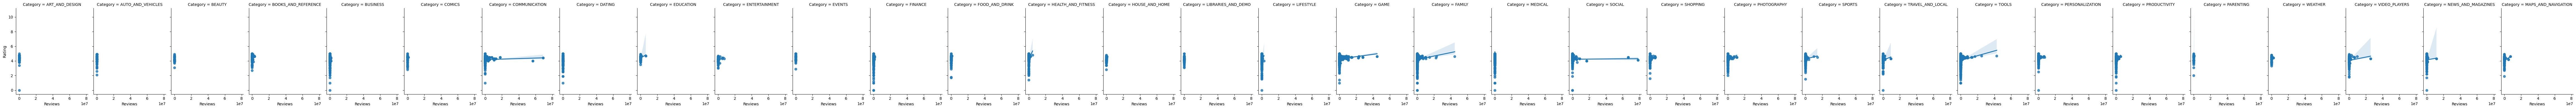

In [122]:
sns.lmplot(x='Reviews', y='Rating', data=data_cleaned, col='Category', height=4, aspect=0.7)
